In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj
import matplotlib.pyplot as plt
%matplotlib inline

## CombiPrecip

In [2]:
ds = xr.open_mfdataset("combiprecip_201805.nc", combine='by_coords')

In [3]:
ds

<xarray.Dataset>
Dimensions:            (chx: 710, chy: 640, dummy: 1, time: 744)
Coordinates:
  * dummy              (dummy) float64 1.0
  * chx                (chx) float64 2.555e+05 2.565e+05 ... 9.635e+05 9.645e+05
  * chy                (chy) float64 -1.595e+05 -1.585e+05 ... 4.795e+05
  * time               (time) datetime64[ns] 2018-05-01T01:00:00 ... 2018-06-01
    lon                (chy, chx) float32 dask.array<chunksize=(640, 710), meta=np.ndarray>
    lat                (chy, chx) float32 dask.array<chunksize=(640, 710), meta=np.ndarray>
Data variables:
    swiss_coordinates  (dummy) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    RR                 (time, chy, chx) float32 dask.array<chunksize=(744, 640, 710), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    institution:               Federal Office of Meteorology and Climatology ...
    References:                
    history:                   Wed Sep 16 07:54:48 2020: ncrcat -O combipreci...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1

In [4]:
ds.isel(chx=[1], time=[0])

<xarray.Dataset>
Dimensions:            (chx: 1, chy: 640, dummy: 1, time: 1)
Coordinates:
  * dummy              (dummy) float64 1.0
  * chx                (chx) float64 2.565e+05
  * chy                (chy) float64 -1.595e+05 -1.585e+05 ... 4.795e+05
  * time               (time) datetime64[ns] 2018-05-01T01:00:00
    lon                (chy, chx) float32 dask.array<chunksize=(640, 1), meta=np.ndarray>
    lat                (chy, chx) float32 dask.array<chunksize=(640, 1), meta=np.ndarray>
Data variables:
    swiss_coordinates  (dummy) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    RR                 (time, chy, chx) float32 dask.array<chunksize=(1, 640, 1), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    institution:               Federal Office of Meteorology and Climatology ...
    References:                
    history:                   Wed Sep 16 07:54:48 2020: ncrcat -O combipreci...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1

In [4]:
ds.time.values

array(['2018-05-01T01:00:00.000000000', '2018-05-01T02:00:00.000000000',
       '2018-05-01T03:00:00.000000000', '2018-05-01T04:00:00.000000000',
       '2018-05-01T05:00:00.000000000', '2018-05-01T06:00:00.000000000',
       '2018-05-01T07:00:00.000000000', '2018-05-01T08:00:00.000000000',
       '2018-05-01T09:00:00.000000000', '2018-05-01T10:00:00.000000000',
       '2018-05-01T11:00:00.000000000', '2018-05-01T12:00:00.000000000',
       '2018-05-01T13:00:00.000000000', '2018-05-01T14:00:00.000000000',
       '2018-05-01T15:00:00.000000000', '2018-05-01T16:00:00.000000000',
       '2018-05-01T17:00:00.000000000', '2018-05-01T18:00:00.000000000',
       '2018-05-01T19:00:00.000000000', '2018-05-01T20:00:00.000000000',
       '2018-05-01T21:00:00.000000000', '2018-05-01T22:00:00.000000000',
       '2018-05-01T23:00:00.000000000', '2018-05-02T00:00:00.000000000',
       '2018-05-02T01:00:00.000000000', '2018-05-02T02:00:00.000000000',
       '2018-05-02T03:00:00.000000000', '2018-05-02

In [5]:
ds.time.values[0], ds.time.values[-1] # one month, 05/2018

(numpy.datetime64('2018-05-01T01:00:00.000000000'),
 numpy.datetime64('2018-06-01T00:00:00.000000000'))

In [6]:
ds.chx.values[0], ds.chx.values[-1] # x coordinates

(255500.0, 964500.0)

In [7]:
ds.chy.values[0], ds.chy.values[-1] # y coordinates

(-159500.0, 479500.0)

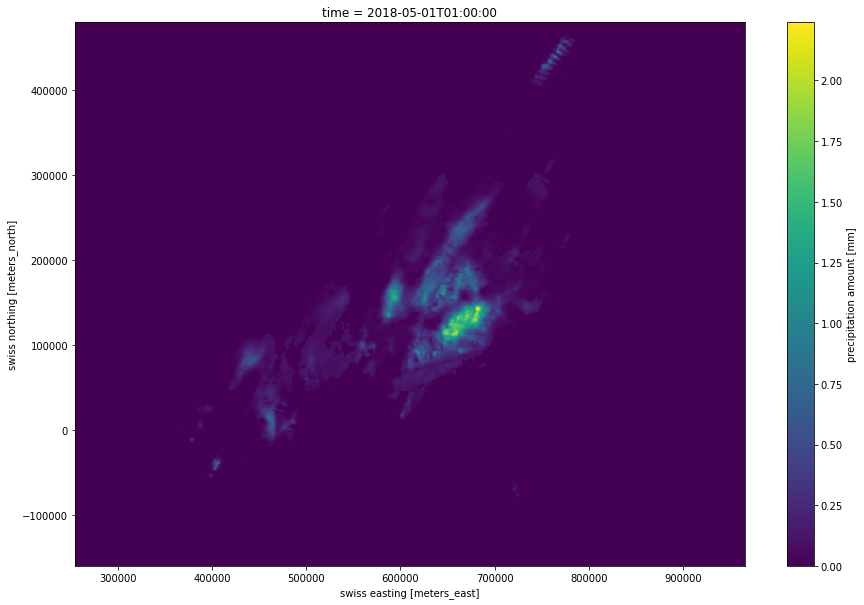

In [8]:
plt.figure(figsize=(15,10))
ds.RR.isel(time=0).plot.pcolormesh("chx", "chy") # observations at time 0

## COSMO-E

In [5]:
cosmo = xr.open_zarr("cosmoe_prec_201805.zarr")

In [6]:
cosmo

<xarray.Dataset>
Dimensions:   (leadtime: 121, member: 21, reftime: 62, x: 188, y: 127)
Coordinates:
    lat       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
  * leadtime  (leadtime) timedelta64[ns] 00:00:00 01:00:00 ... 5 days 00:00:00
    lon       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
  * member    (member) int32 0 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * reftime   (reftime) datetime64[ns] 2018-05-01 ... 2018-05-31T12:00:00
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 180 181 182 183 184 185 186 187
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 119 120 121 122 123 124 125 126
Data variables:
    PREC      (reftime, leadtime, member, y, x) float32 dask.array<chunksize=(1, 41, 21, 127, 188), meta=np.ndarray>

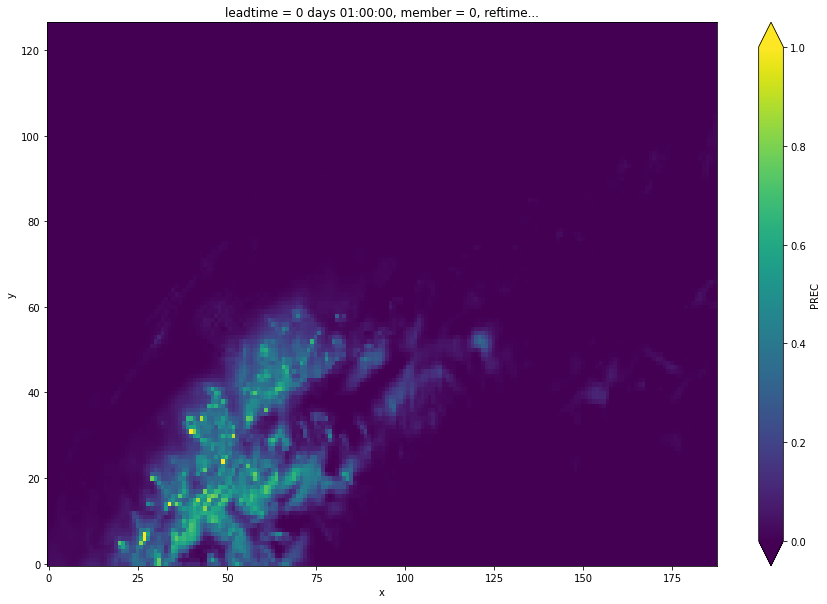

In [7]:
plt.figure(figsize=(15,10))
cosmo.PREC.isel(leadtime=1, member=0, reftime=1).plot.pcolormesh("x", "y", cmap='viridis', vmin=0, vmax=1)
plt.show()

### Reproject in Swiss coordinates

In [8]:
src_proj = pyproj.Proj("EPSG:4326")
dst_proj = pyproj.Proj("EPSG:21781")

src_x = cosmo.lon.values
src_y = cosmo.lat.values
dst_x, dst_y = pyproj.transform(src_proj, dst_proj, src_x, src_y, always_xy=True)

cosmo = cosmo.assign_coords({"chx": (("y", "x"), dst_x) , "chy": (("y", "x"), dst_y)})
cosmo

/Users/alexandrabutoi/Documents/GitHub/Realistic-looking-rainfall-forecasts/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


<xarray.Dataset>
Dimensions:   (leadtime: 121, member: 21, reftime: 62, x: 188, y: 127)
Coordinates:
    lat       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
  * leadtime  (leadtime) timedelta64[ns] 00:00:00 01:00:00 ... 5 days 00:00:00
    lon       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
  * member    (member) int32 0 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * reftime   (reftime) datetime64[ns] 2018-05-01 ... 2018-05-31T12:00:00
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 180 181 182 183 184 185 186 187
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 119 120 121 122 123 124 125 126
    chx       (y, x) float64 4.5e+05 4.522e+05 4.544e+05 ... 8.554e+05 8.577e+05
    chy       (y, x) float64 3.944e+04 3.951e+04 3.958e+04 ... 3.33e+05 3.33e+05
Data variables:
    PREC      (reftime, leadtime, member, y, x) float32 dask.array<chunksize=(1, 41, 21, 127, 188), meta=np.ndarray>

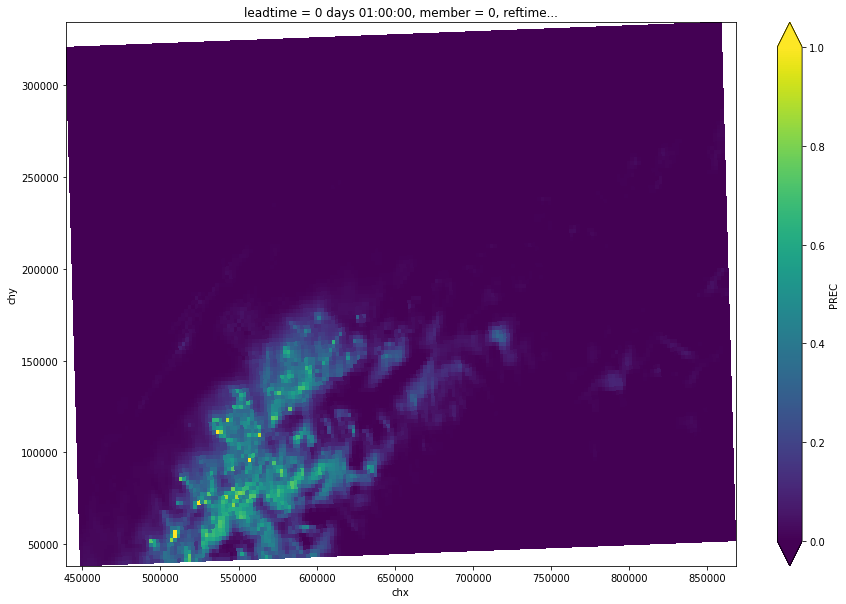

In [9]:
plt.figure(figsize=(15,10))
cosmo.PREC.isel(leadtime=1, member=0, reftime=1).plot.pcolormesh("chx", "chy", cmap='viridis', vmin=0, vmax=1)
plt.show()

#### Analysis

In [10]:
cosmo.PREC.isel(leadtime=1, member=0, reftime=1)

<xarray.DataArray 'PREC' (y: 127, x: 188)>
dask.array<getitem, shape=(127, 188), dtype=float32, chunksize=(127, 188), chunktype=numpy.ndarray>
Coordinates:
    lat       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
    leadtime  timedelta64[ns] 01:00:00
    lon       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
    member    int32 0
    reftime   datetime64[ns] 2018-05-01T12:00:00
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 180 181 182 183 184 185 186 187
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 119 120 121 122 123 124 125 126
    chx       (y, x) float64 4.5e+05 4.522e+05 4.544e+05 ... 8.554e+05 8.577e+05
    chy       (y, x) float64 3.944e+04 3.951e+04 3.958e+04 ... 3.33e+05 3.33e+05

In [11]:
cosmo.PREC.isel(leadtime=0, member=0, reftime=0)

<xarray.DataArray 'PREC' (y: 127, x: 188)>
dask.array<getitem, shape=(127, 188), dtype=float32, chunksize=(127, 188), chunktype=numpy.ndarray>
Coordinates:
    lat       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
    leadtime  timedelta64[ns] 00:00:00
    lon       (y, x) float32 dask.array<chunksize=(127, 188), meta=np.ndarray>
    member    int32 0
    reftime   datetime64[ns] 2018-05-01
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 180 181 182 183 184 185 186 187
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 119 120 121 122 123 124 125 126
    chx       (y, x) float64 4.5e+05 4.522e+05 4.544e+05 ... 8.554e+05 8.577e+05
    chy       (y, x) float64 3.944e+04 3.951e+04 3.958e+04 ... 3.33e+05 3.33e+05

In [16]:
cosmo.PREC.reftime.values[0], cosmo.PREC.reftime.values[-1]

(numpy.datetime64('2018-05-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-31T12:00:00.000000000'))

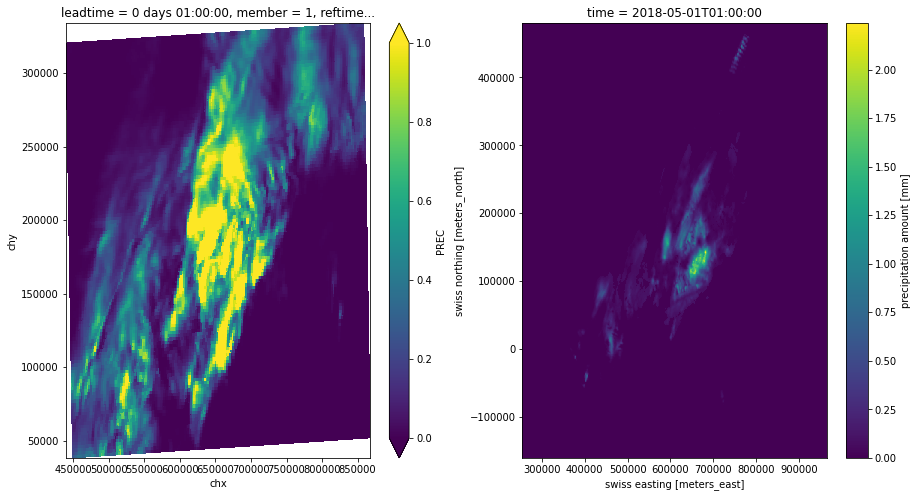

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(15,8))
axes[0].set_title("1")
cosmo.PREC.isel(leadtime=1, member=1, reftime=0).plot.pcolormesh("chx", "chy", ax=axes[0], cmap='viridis', vmin=0, vmax=1)
ds.RR.isel(time=0).plot.pcolormesh("chx", "chy", ax=axes[1])

In [19]:
# predictions and observations for the hour before
print(cosmo.PREC.isel(leadtime=1, member=1, reftime=0).reftime + cosmo.PREC.isel(leadtime=1, member=1, reftime=0).leadtime)
print(ds.RR.isel(time=0).time)

<xarray.DataArray ()>
array('2018-05-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    leadtime  timedelta64[ns] 01:00:00
    member    int32 1
    reftime   datetime64[ns] 2018-05-01
<xarray.DataArray 'time' ()>
array('2018-05-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-05-01T01:00:00
Attributes:
    long_name:  time
    axis:       T


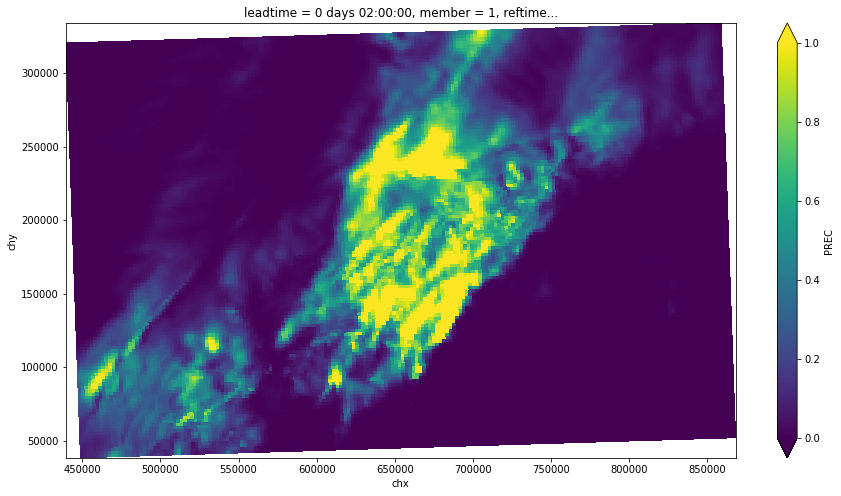

In [117]:
fig, axes = plt.subplots(ncols=1, figsize=(15,8))
cosmo.PREC.isel(leadtime=2, member=1, reftime=0).plot.pcolormesh("chx", "chy", cmap='viridis', vmin=0, vmax=1)
plt.show()

In [113]:
cosmo.PREC.isel(leadtime=0, member=1, reftime=0).reftime.values

numpy.datetime64('2018-05-01T00:00:00.000000000')

In [109]:
cosmo.PREC.isel(leadtime=2, member=1, reftime=0).leadtime.values

numpy.timedelta64(7200000000000,'ns')

In [115]:
cosmo.PREC.isel(leadtime=0, member=1, reftime=0).leadtime + cosmo.PREC.isel(leadtime=0, member=1, reftime=0).reftime

<xarray.DataArray ()>
array('2018-05-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    leadtime  timedelta64[ns] 00:00:00
    member    int32 1
    reftime   datetime64[ns] 2018-05-01

In [31]:
cosmo.PREC.isel(leadtime=1, member=0, reftime=1).y

<xarray.DataArray 'y' (y: 127)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126])
Coordinates:
    leadtime  timedelta64[ns] 01:00:00
    member    int32 0
    reftime   datetime64[ns] 2018-05-01T12:00:00
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 119 120 121 122 123 124 125 126

In [13]:
cosmo.PREC.isel(leadtime=1, member=0, reftime=0).values

array([[1.8008590e-01, 2.1875501e-01, 2.6221514e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9947195e-01, 2.3563886e-01, 2.5832534e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0253277e-01, 2.5292969e-01, 2.6632524e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.5789948e-05, 5.4836273e-05, 5.4359436e-05, ..., 2.6250839e-02,
        2.6322126e-02, 2.6751041e-02],
       [5.6028366e-05, 5.5074692e-05, 5.4359436e-05, ..., 2.7338028e-02,
        2.6655197e-02, 2.7040243e-02],
       [8.4877014e-05, 8.4161758e-05, 8.3208084e-05, ..., 3.2425404e-02,
        3.0187607e-02, 2.9152155e-02]], dtype=float32)

In [22]:
cosmo.PREC.reftime.values[0], cosmo.PREC.reftime.values[-1]

(numpy.datetime64('2018-05-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-31T12:00:00.000000000'))

In [14]:
cosmo.PREC.reftime.values

array(['2018-05-01T00:00:00.000000000', '2018-05-01T12:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-05-02T12:00:00.000000000',
       '2018-05-03T00:00:00.000000000', '2018-05-03T12:00:00.000000000',
       '2018-05-04T00:00:00.000000000', '2018-05-04T12:00:00.000000000',
       '2018-05-05T00:00:00.000000000', '2018-05-05T12:00:00.000000000',
       '2018-05-06T00:00:00.000000000', '2018-05-06T12:00:00.000000000',
       '2018-05-07T00:00:00.000000000', '2018-05-07T12:00:00.000000000',
       '2018-05-08T00:00:00.000000000', '2018-05-08T12:00:00.000000000',
       '2018-05-09T00:00:00.000000000', '2018-05-09T12:00:00.000000000',
       '2018-05-10T00:00:00.000000000', '2018-05-10T12:00:00.000000000',
       '2018-05-11T00:00:00.000000000', '2018-05-11T12:00:00.000000000',
       '2018-05-12T00:00:00.000000000', '2018-05-12T12:00:00.000000000',
       '2018-05-13T00:00:00.000000000', '2018-05-13T12:00:00.000000000',
       '2018-05-14T00:00:00.000000000', '2018-05-14

In [23]:
cosmo.PREC.chx.values[0], cosmo.PREC.chx.values[-1]

(array([449974.33803416, 452205.5472066 , 454433.33648937, 456664.54821141,
        458892.35143636, 461120.17610069, 463351.3774344 , 465579.17224498,
        467806.95307679, 470038.15858762, 472265.95039677, 474493.77604566,
        476724.97299437, 478952.77575234, 481180.56793648, 483411.7789659 ,
        485639.58908944, 487870.78194744, 490098.57521757, 492326.36846804,
        494557.57584791, 496785.35549931, 499013.15949463, 501244.35654461,
        503472.15765317, 505699.95469305, 507931.13937814, 510158.93010051,
        512390.14689242, 514617.93969272, 516845.72545374, 519076.94463143,
        521304.73012042, 523532.52180005, 525763.70545868, 527991.49513435,
        530219.29239867, 532450.48806568, 534678.29188444, 536906.06274894,
        539137.26633499, 541365.05169717, 543596.22946409, 545824.0272785 ,
        548051.83219281, 550282.99790815, 552510.81555101, 554738.57109248,
        556969.7666757 , 559197.57906685, 561425.36502888, 563656.55505694,
        5658

In [76]:
# COSMO-E has reftime at 00:00 and 12:00, CombiPrecip has every hour
cosmo.PREC.reftime.values.shape, cosmo.PREC.leadtime.values.shape, ds.RR.time.values.shape

((62,), (121,), (744,))

In [77]:
cosmo.PREC.leadtime.values  # hourly after reftime

array([              0,   3600000000000,   7200000000000,  10800000000000,
        14400000000000,  18000000000000,  21600000000000,  25200000000000,
        28800000000000,  32400000000000,  36000000000000,  39600000000000,
        43200000000000,  46800000000000,  50400000000000,  54000000000000,
        57600000000000,  61200000000000,  64800000000000,  68400000000000,
        72000000000000,  75600000000000,  79200000000000,  82800000000000,
        86400000000000,  90000000000000,  93600000000000,  97200000000000,
       100800000000000, 104400000000000, 108000000000000, 111600000000000,
       115200000000000, 118800000000000, 122400000000000, 126000000000000,
       129600000000000, 133200000000000, 136800000000000, 140400000000000,
       144000000000000, 147600000000000, 151200000000000, 154800000000000,
       158400000000000, 162000000000000, 165600000000000, 169200000000000,
       172800000000000, 176400000000000, 180000000000000, 183600000000000,
       187200000000000, 1

In [78]:
cosmo.PREC.leadtime.values.shape

(121,)

In [16]:
cosmo.PREC.reftime[-2] + cosmo.PREC.leadtime # add reftime to leadtime

<xarray.DataArray (leadtime: 121)>
array(['2018-05-31T00:00:00.000000000', '2018-05-31T01:00:00.000000000',
       '2018-05-31T02:00:00.000000000', '2018-05-31T03:00:00.000000000',
       '2018-05-31T04:00:00.000000000', '2018-05-31T05:00:00.000000000',
       '2018-05-31T06:00:00.000000000', '2018-05-31T07:00:00.000000000',
       '2018-05-31T08:00:00.000000000', '2018-05-31T09:00:00.000000000',
       '2018-05-31T10:00:00.000000000', '2018-05-31T11:00:00.000000000',
       '2018-05-31T12:00:00.000000000', '2018-05-31T13:00:00.000000000',
       '2018-05-31T14:00:00.000000000', '2018-05-31T15:00:00.000000000',
       '2018-05-31T16:00:00.000000000', '2018-05-31T17:00:00.000000000',
       '2018-05-31T18:00:00.000000000', '2018-05-31T19:00:00.000000000',
       '2018-05-31T20:00:00.000000000', '2018-05-31T21:00:00.000000000',
       '2018-05-31T22:00:00.000000000', '2018-05-31T23:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-06-01T01:00:00.000000000',
       '2018-06-01T02:00:00.000000000', '2018-06-01T03:00:00.000000000',
       '2018-06-01T04:00:00.000000000', '2018-06-01T05:00:00.000000000',
       '2018-06-01T06:00:00.000000000', '2018-06-01T07:00:00.000000000',
       '2018-06-01T08:00:00.000000000', '2018-06-01T09:00:00.000000000',
       '2018-06-01T10:00:00.000000000', '2018-06-01T11:00:00.000000000',
       '2018-06-01T12:00:00.000000000', '2018-06-01T13:00:00.000000000',
       '2018-06-01T14:00:00.000000000', '2018-06-01T15:00:00.000000000',
...
       '2018-06-03T10:00:00.000000000', '2018-06-03T11:00:00.000000000',
       '2018-06-03T12:00:00.000000000', '2018-06-03T13:00:00.000000000',
       '2018-06-03T14:00:00.000000000', '2018-06-03T15:00:00.000000000',
       '2018-06-03T16:00:00.000000000', '2018-06-03T17:00:00.000000000',
       '2018-06-03T18:00:00.000000000', '2018-06-03T19:00:00.000000000',
       '2018-06-03T20:00:00.000000000', '2018-06-03T21:00:00.000000000',
       '2018-06-03T22:00:00.000000000', '2018-06-03T23:00:00.000000000',
       '2018-06-04T00:00:00.000000000', '2018-06-04T01:00:00.000000000',
       '2018-06-04T02:00:00.000000000', '2018-06-04T03:00:00.000000000',
       '2018-06-04T04:00:00.000000000', '2018-06-04T05:00:00.000000000',
       '2018-06-04T06:00:00.000000000', '2018-06-04T07:00:00.000000000',
       '2018-06-04T08:00:00.000000000', '2018-06-04T09:00:00.000000000',
       '2018-06-04T10:00:00.000000000', '2018-06-04T11:00:00.000000000',
       '2018-06-04T12:00:00.000000000', '2018-06-04T13:00:00.000000000',
       '2018-06-04T14:00:00.000000000', '2018-06-04T15:00:00.000000000',
       '2018-06-04T16:00:00.000000000', '2018-06-04T17:00:00.000000000',
       '2018-06-04T18:00:00.000000000', '2018-06-04T19:00:00.000000000',
       '2018-06-04T20:00:00.000000000', '2018-06-04T21:00:00.000000000',
       '2018-06-04T22:00:00.000000000', '2018-06-04T23:00:00.000000000',
       '2018-06-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    reftime   datetime64[ns] 2018-05-31
  * leadtime  (leadtime) timedelta64[ns] 00:00:00 01:00:00 ... 5 days 00:00:00

In [17]:
cosmo.PREC.isel(leadtime=-1, member=0, reftime=-1).values

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.125     ,  0.65234375,  0.8671875 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67578125,  4.3554688 ,  1.0078125 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.75      , 10.2421875 ,  0.2109375 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)